<a href="https://colab.research.google.com/github/ajikgoez/r-python/blob/master/maxim_ride_hiling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = '/content/maximku.xlsx'

In [9]:
data = pd.read_excel(file_path)
data

,Time,Day,Fee_Rp,Cost_Rp,Start,Stop
0,07:48:00,Friday,890.0,8900,Asrama UGM Ratnaningsih Kinanti area Caturtunggal,"Gedung Margono Suradji, FKG UGM Jalan Medika a..."
1,13:16:00,Thursday,890.0,8900,Saku Coffee dan Space Jalan Kelapa area Demangan,Kantin Ugu FBS UNY area Caturtunggal
2,12:31:00,Thursday,2475.0,16500,Pusat Bahasa FIB UGM Jalan Nusantara area Catu...,Jalan Kenanga Gang Mawar 2 area Banguntapan
3,07:03:00,Thursday,890.0,8900,Asrama UGM Ratnaningsih Kinanti area Caturtunggal,Gedung K Fakultas Psikologi UGM area Caturtunggal
4,06:38:00,Thursday,890.0,8900,Kos Mas Bani (area Sinduadi),Pusat Bahasa FIB UGM (area Caturtunggal)
...,...,...,...,...,...,...
96,09:51:00,Wednesday,890.0,8900,"Gang Gayamsari I, 3 (area Caturtunggal)",Fakultas Geografi UGM (area Caturtunggal)
97,07:18:00,Wednesday,1920.0,12800,"Jalanan Jeruk, Caturtunggal, F/7 (area Caturtu...",Drop Off MAXIM Lempuyangan (area Bausasran)
98,15:08:00,Tuesday,2580.0,17200,"Jalan Lembah UGM, 4 (area Caturtunggal)","Jalan Sonopakis Lor Gang Dahlia, 1 (area Ngest..."
99,14:22:00,Tuesday,890.0,8900,Gedung Layanan Akademik FBS UNY (area Caturtun...,Jalan Kuningan


In [10]:
# Sort the data by 'Cost_Rp' in descending order
sorted_data = data.sort_values(by='Cost_Rp', ascending=False)

In [11]:
# Select the top 10 highest ride costs
top_costs = sorted_data.head(10)

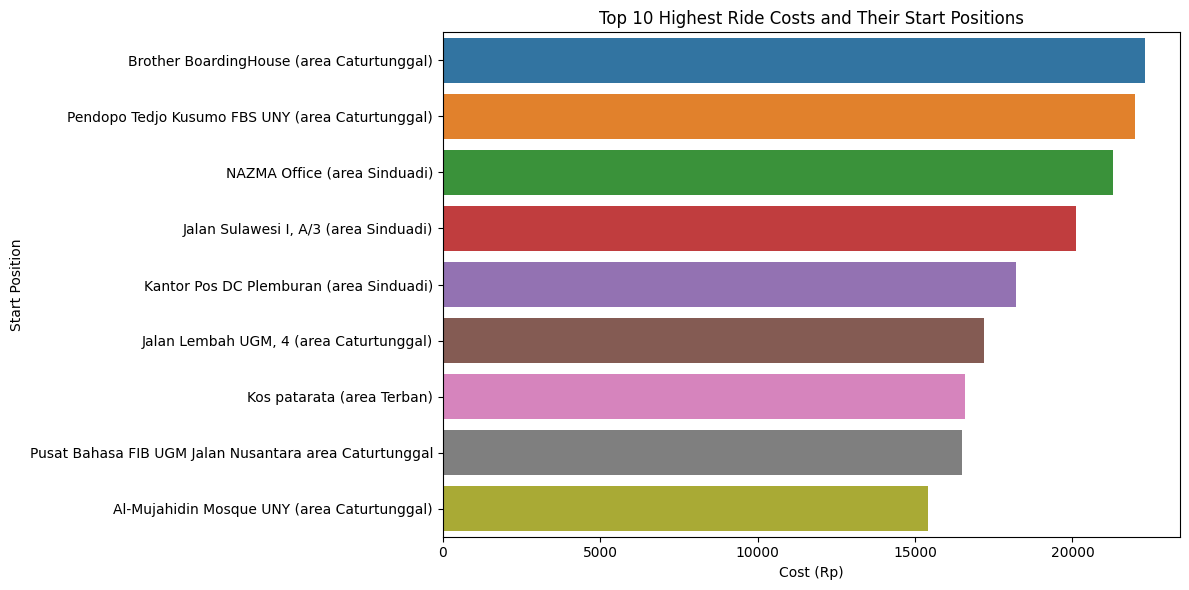

In [13]:
# Create a barplot for the highest ride costs and their start positions
plt.figure(figsize=(12, 6))
sns.barplot(data=top_costs, x='Cost_Rp', y='Start')
plt.title('Top 10 Highest Ride Costs and Their Start Positions')
plt.xlabel('Cost (Rp)')
plt.ylabel('Start Position')
plt.tight_layout()




In [15]:
# Count the number of rides for each day
ride_counts_by_day = data['Day'].value_counts()


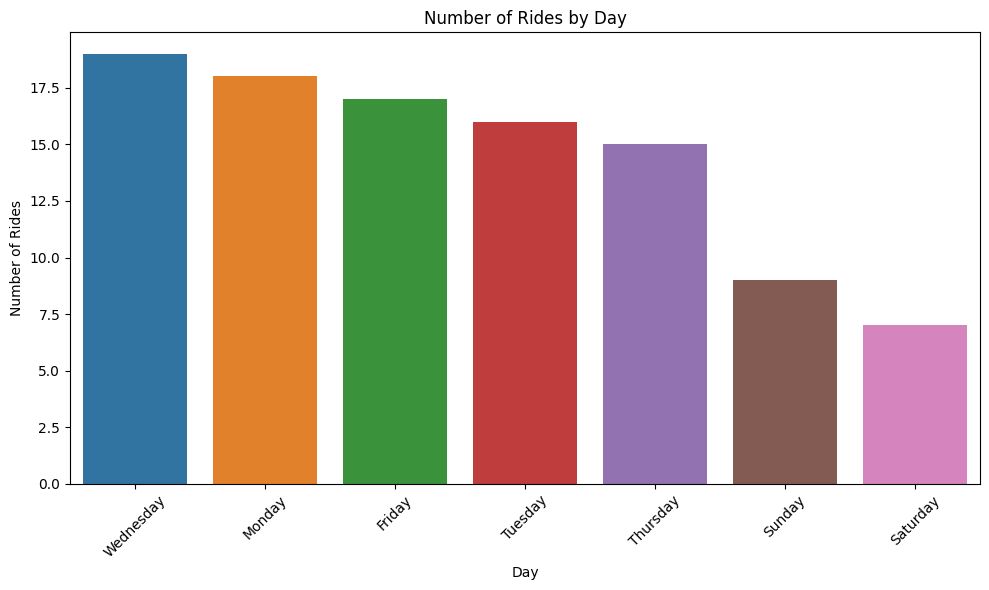

In [16]:
# Create a barplot for the number of rides by day
plt.figure(figsize=(10, 6))
sns.barplot(x=ride_counts_by_day.index, y=ride_counts_by_day.values)
plt.title('Number of Rides by Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()


In [18]:
# Convert the Day column to categorical format with ordered levels
data["Day"] = pd.Categorical(data["Day"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

Text(0.5, 0, 'Total Cost of the Trip (Rp)')

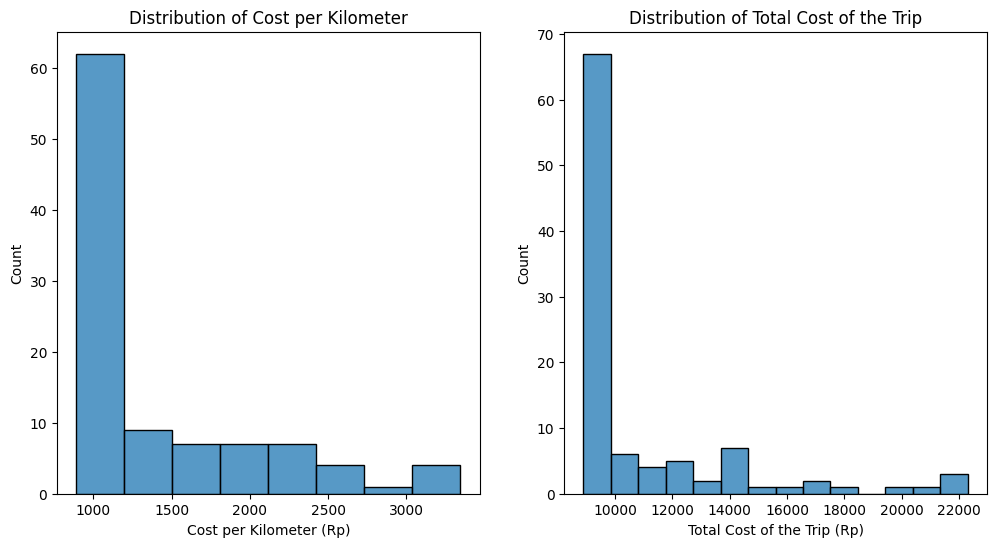

In [19]:
# Plot the distribution of cost per kilometer and total cost of the trip
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=data, x="Fee_Rp", ax=ax[0])
ax[0].set_title("Distribution of Cost per Kilometer")
ax[0].set_xlabel("Cost per Kilometer (Rp)")
sns.histplot(data=data, x="Cost_Rp", ax=ax[1])
ax[1].set_title("Distribution of Total Cost of the Trip")
ax[1].set_xlabel("Total Cost of the Trip (Rp)")

Text(0, 0.5, 'Total Cost of the Trip (Rp)')

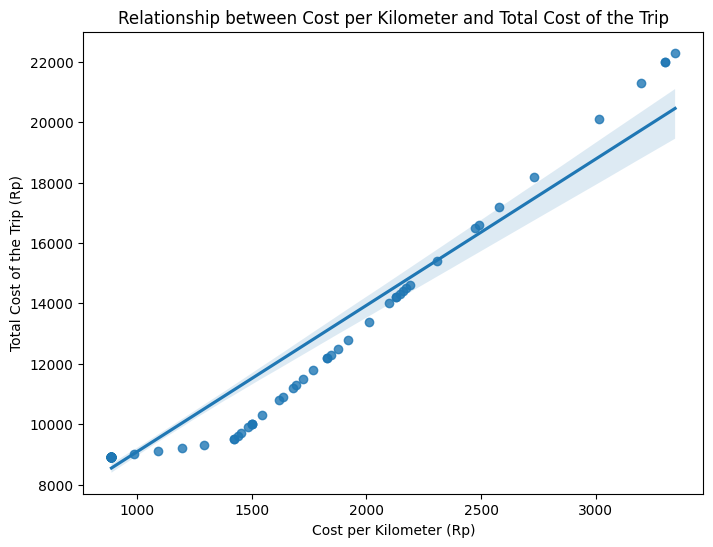

In [20]:
# Plot the scatter plot of cost per kilometer and total cost of the trip with a regression line
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(data=data, x="Fee_Rp", y="Cost_Rp", ax=ax)
ax.set_title("Relationship between Cost per Kilometer and Total Cost of the Trip")
ax.set_xlabel("Cost per Kilometer (Rp)")
ax.set_ylabel("Total Cost of the Trip (Rp)")

Text(0, 0.5, 'Total Cost of the Trip (Rp)')

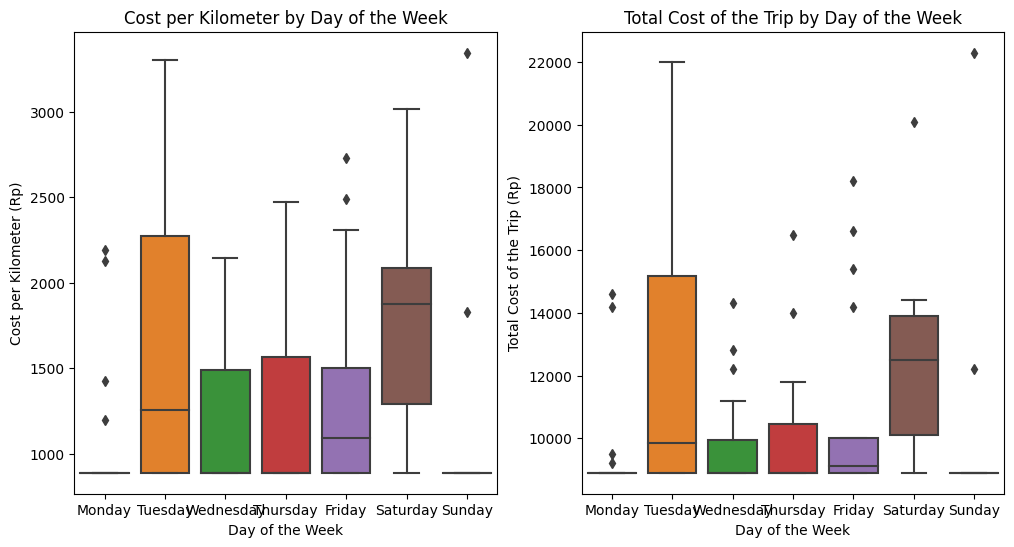

In [21]:
# Plot the box plot of cost per kilometer and total cost of the trip by day of the week
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=data, x="Day", y="Fee_Rp", ax=ax[0])
ax[0].set_title("Cost per Kilometer by Day of the Week")
ax[0].set_xlabel("Day of the Week")
ax[0].set_ylabel("Cost per Kilometer (Rp)")
sns.boxplot(data=data, x="Day", y="Cost_Rp", ax=ax[1])
ax[1].set_title("Total Cost of the Trip by Day of the Week")
ax[1].set_xlabel("Day of the Week")
ax[1].set_ylabel("Total Cost of the Trip (Rp)")

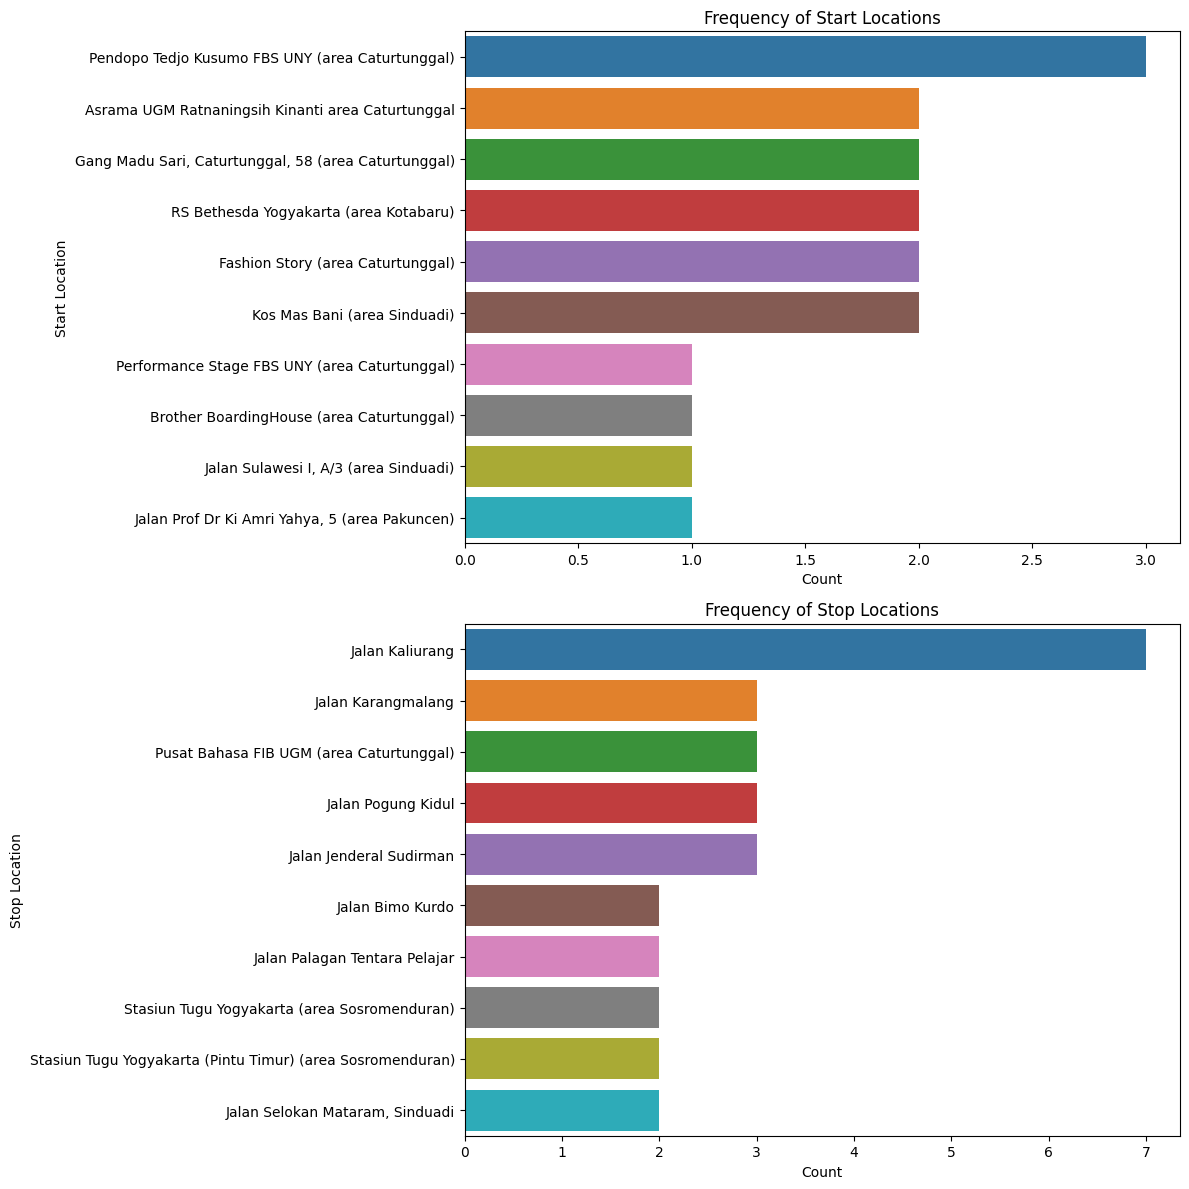

In [22]:
# Plot the bar plot of the frequency of start and stop locations
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.countplot(data=data, y="Start", order=data["Start"].value_counts().index[:10], ax=ax[0])
ax[0].set_title("Frequency of Start Locations")
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Start Location")
sns.countplot(data=data, y="Stop", order=data["Stop"].value_counts().index[:10], ax=ax[1])
ax[1].set_title("Frequency of Stop Locations")
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Stop Location")
plt.tight_layout()

In [23]:
# Convert the Day column to categorical format with ordered levels
data["Day"] = pd.Categorical(data["Day"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [24]:
# Group the data by day and calculate the average total cost of the trip
data_grouped = data.groupby("Day")["Cost_Rp"].mean().reset_index()

Text(0, 0.5, 'Average Total Cost of the Trip (Rp)')

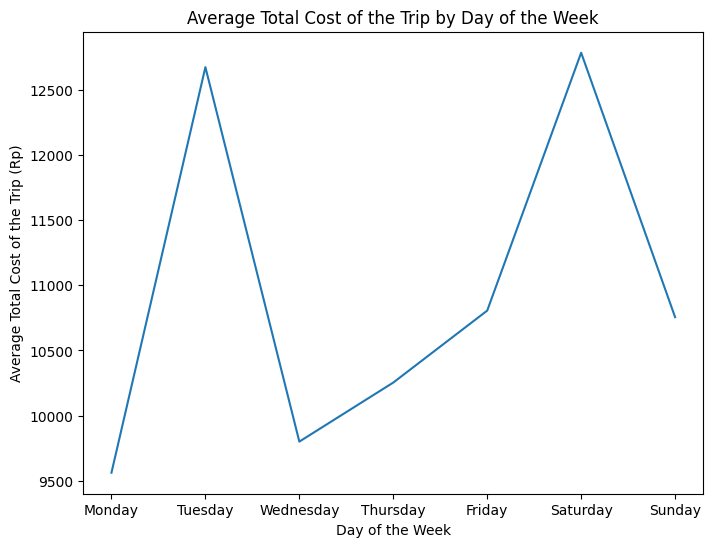

In [25]:
# Plot the line graph of the average total cost of the trip by day of the week
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=data_grouped, x="Day", y="Cost_Rp", ax=ax)
ax.set_title("Average Total Cost of the Trip by Day of the Week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Average Total Cost of the Trip (Rp)")